In [3]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal as mvn

In [4]:
df_train = pd.read_csv('/content/david uriel lizama ferrer - MNIST_train.csv', index_col = 0)
df_train = df_train.drop('index',1)
df_test = pd.read_csv('/content/david uriel lizama ferrer - MNIST_test.csv', index_col = 0)
df_test = df_test.drop('index',1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  after removing the cwd from sys.path.


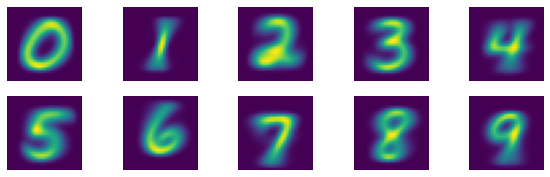

In [5]:
plt.figure(figsize=(10,3))
for i in range(10):
    avgImg = np.average(df_train.loc[df_train["labels"]==i].drop(["labels"], axis = 1),0)
    plt.subplot(2, 5, i+1)
    plt.imshow(avgImg.reshape((28,28))) 
    plt.axis('off')

In [6]:
X_train = df_train.to_numpy()
X_test = df_test.to_numpy()
y_train = X_train[:,0].astype(int)
y_test = X_test[:,0].astype(int)
y_train.shape

(60000,)

In [7]:
X_train = X_train[:,1:]
X_test = X_test[:,1:]
X_train.shape

(60000, 784)

In [8]:
# Normalize data
X_train = (X_train - np.mean(X_train)) / np.std(X_train)
X_test = (X_test - np.mean(X_test)) / np.std(X_test)

In [9]:
y_train

array([5, 0, 4, ..., 5, 6, 8])

In [10]:
class GaussBayes:

  def fit(self, X, y, epsilon = 1e-3):

    self.likelihoods = dict()
    self.priors = dict()
    self.K = set(y.astype(int))

    for k in self.K:

      X_k = X[y == k, :]
      N_k, D = X_k.shape
      mu_k = X_k.mean(axis = 0)

      self.likelihoods[k] = {'mean': X_k.mean(axis = 0), 'cov': (1/(N_k -1))*np.matmul((X_k-mu_k).T, X_k - mu_k) + epsilon*np.identity(D)}
      self.priors[k] = len(X_k)/len(X)

  def predict(self, X):

    N, D = X.shape
    P_hat = np.zeros((N, len(self.K)))

    for k, l in self.likelihoods.items():
      P_hat[:,k] = mvn.logpdf(X, l['mean'], l['cov']) + np.log(self.priors[k])

    return P_hat.argmax(axis = 1)

In [11]:
def accuracy(y,y_hat):
  return np.mean(y == y_hat)

In [12]:
grid_epsilon = np.array([1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 8e-1, 5e-1, 4e-1, 3e-1, 2e-1, 1e-1, 0.5, 0.8, 1])

In [13]:
gbayes = GaussBayes()
gbayes.fit(X_train,y_train, epsilon = grid_epsilon[0])
y_pred_train0 = gbayes.predict(X_train)
m0_train_ac = accuracy(y_train, y_pred_train0)
m0_train_ac

0.8053333333333333

In [14]:
y_pred_test0 = gbayes.predict(X_test)
m0_test_ac = accuracy(y_test, y_pred_test0)
m0_test_ac

0.8676

In [15]:
gbayes.fit(X_train,y_train, epsilon = grid_epsilon[1])
y_hat1 = gbayes.predict(X_train)
m1_train_ac = accuracy(y_train, y_hat1)
m1_train_ac

0.8315166666666667

In [16]:
y_pred_test1 = gbayes.predict(X_test)
m1_test_ac = accuracy(y_test, y_pred_test1)
m1_test_ac

0.8125

In [17]:
gbayes.fit(X_train,y_train, epsilon = grid_epsilon[2])
y_hat2 = gbayes.predict(X_train)
m2_train_ac = accuracy(y_train, y_hat2)
m2_train_ac

0.8607666666666667

In [18]:
y_pred_test2 = gbayes.predict(X_test)
m2_test_ac = accuracy(y_test, y_pred_test2)
m2_test_ac

0.8335

In [19]:
gbayes.fit(X_train,y_train, epsilon = grid_epsilon[3])
y_hat3 = gbayes.predict(X_train)
m3_train_ac = accuracy(y_train, y_hat3)
m3_train_ac

0.8949833333333334

In [20]:
y_pred_test3 = gbayes.predict(X_test)
m3_test_ac = accuracy(y_test, y_pred_test3)
m3_test_ac

0.8703

In [21]:
gbayes.fit(X_train,y_train, epsilon = grid_epsilon[4])
y_hat4 = gbayes.predict(X_train)
m4_train_ac = accuracy(y_train, y_hat4)
m4_train_ac

0.9299666666666667

In [22]:
y_pred_test4 = gbayes.predict(X_test)
m4_test_ac = accuracy(y_test, y_pred_test4)
m4_test_ac

0.9095

In [23]:
gbayes.fit(X_train,y_train, epsilon = grid_epsilon[5])
y_hat5 = gbayes.predict(X_train)
m5_train_ac = accuracy(y_train, y_hat5)
m5_train_ac

0.9572833333333334

In [24]:
y_pred_test5 = gbayes.predict(X_test)
m5_test_ac = accuracy(y_test, y_pred_test5)
m5_test_ac

0.9561

In [25]:
gbayes.fit(X_train,y_train, epsilon = grid_epsilon[6])
y_hat6 = gbayes.predict(X_train)
m6_train_ac = accuracy(y_train, y_hat6)
m6_train_ac

0.9592833333333334

In [26]:
y_pred_test6 = gbayes.predict(X_test)
m6_test_ac = accuracy(y_test, y_pred_test6)
m6_test_ac

0.9559

In [27]:
gbayes.fit(X_train,y_train, epsilon = grid_epsilon[7])
y_hat7 = gbayes.predict(X_train)
m7_train_ac = accuracy(y_train, y_hat7)
m7_train_ac

0.9597166666666667

In [28]:
y_pred_test7 = gbayes.predict(X_test)
m7_test_ac = accuracy(y_test, y_pred_test7)
m7_test_ac

0.9565

In [29]:
gbayes.fit(X_train,y_train, epsilon = grid_epsilon[8])
y_hat8 = gbayes.predict(X_train)
m8_train_ac = accuracy(y_train, y_hat8)
m8_train_ac

0.9594333333333334

In [30]:
y_pred_test8 = gbayes.predict(X_test)
m8_test_ac = accuracy(y_test, y_pred_test8)
m8_test_ac

0.9557

In [31]:
gbayes.fit(X_train,y_train, epsilon = grid_epsilon[9])
y_hat9 = gbayes.predict(X_train)
m9_train_ac = accuracy(y_train, y_hat9)
m9_train_ac

0.9588166666666667

In [32]:
y_pred_test9 = gbayes.predict(X_test)
m9_test_ac = accuracy(y_test, y_pred_test9)
m9_test_ac

0.9526

In [33]:
gbayes.fit(X_train,y_train, epsilon = grid_epsilon[10])
y_hat10 = gbayes.predict(X_train)
m10_train_ac = accuracy(y_train, y_hat10)
m10_train_ac

0.9551166666666666

In [34]:
y_pred_test10 = gbayes.predict(X_test)
m10_test_ac = accuracy(y_test, y_pred_test10)
m10_test_ac

0.9464

In [35]:
gbayes.fit(X_train,y_train, epsilon = grid_epsilon[11])
y_hat11 = gbayes.predict(X_train)
m11_train_ac = accuracy(y_train, y_hat11)
m11_train_ac

0.9592833333333334

In [36]:
y_pred_test11 = gbayes.predict(X_test)
m11_test_ac = accuracy(y_test, y_pred_test11)
m11_test_ac

0.9559

In [37]:
gbayes.fit(X_train,y_train, epsilon = grid_epsilon[12])
y_hat12 = gbayes.predict(X_train)
m12_train_ac = accuracy(y_train, y_hat12)
m12_train_ac

0.9572833333333334

In [38]:
y_pred_test12 = gbayes.predict(X_test)
m12_test_ac = accuracy(y_test, y_pred_test12)
m12_test_ac

0.9561

In [39]:
gbayes.fit(X_train,y_train, epsilon = grid_epsilon[13])
y_hat13 = gbayes.predict(X_train)
m13_train_ac =accuracy(y_train, y_hat13)
m13_train_ac

0.9552166666666667

In [40]:
y_pred_test13 = gbayes.predict(X_test)
m13_test_ac = accuracy(y_test, y_pred_test13)
m13_test_ac

0.9542

In [41]:
results = pd.DataFrame({'Epsilon': grid_epsilon, 
              'Train' : [m0_train_ac, m1_train_ac, m2_train_ac, m3_train_ac, m4_train_ac, m5_train_ac, m6_train_ac, m7_train_ac,
 m8_train_ac, m9_train_ac, m10_train_ac, m11_train_ac, m12_train_ac, m13_train_ac],
              'Test': [m0_test_ac, m1_test_ac, m2_test_ac, m3_test_ac, m4_test_ac, m5_test_ac, m6_test_ac, m7_test_ac,
 m8_test_ac, m9_test_ac, m10_test_ac, m11_test_ac, m12_test_ac, m13_test_ac]})
results

,Epsilon,Train,Test
0,0.000001,0.805333,0.8676
1,0.000010,0.831517,0.8125
2,0.000100,0.860767,0.8335
3,0.001000,0.894983,0.8703
4,0.010000,0.929967,0.9095
5,0.800000,0.957283,0.9561
6,0.500000,0.959283,0.9559
7,0.400000,0.959717,0.9565
8,0.300000,0.959433,0.9557
9,0.200000,0.958817,0.9526


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-package

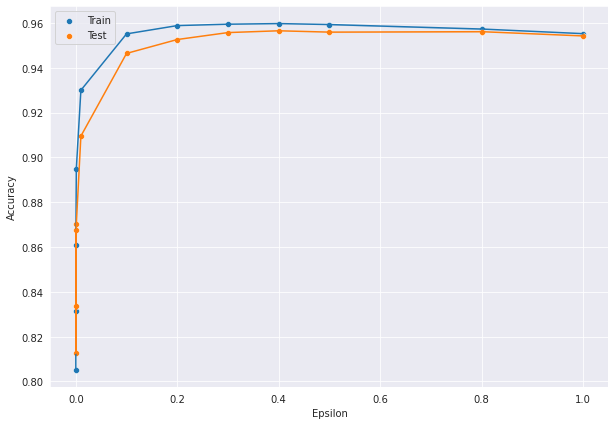

In [42]:
plt.figure(figsize = (10,7))
sns.set_style('darkgrid')
sns.lineplot(results.Epsilon, results.Train)
sns.lineplot(results.Epsilon, results.Test)
sns.scatterplot(results.Epsilon, results.Train, label = 'Train')
sns.scatterplot(results.Epsilon, results.Test, label = 'Test')
plt.ylabel('Accuracy')
plt.legend()

The best model is the number 7 with an epsilon of 0.4.

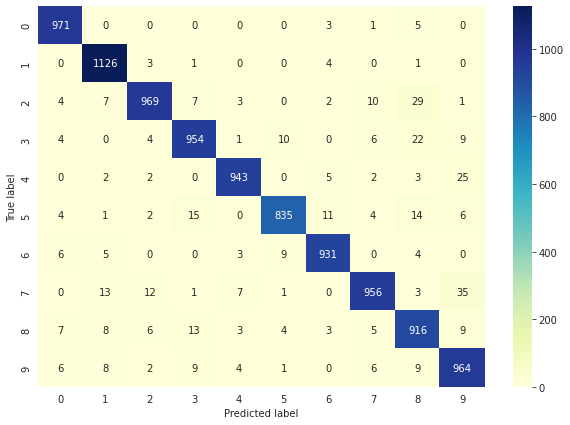

In [46]:
plt.figure(figsize=(10,7))
y_actu = pd.Series(y_test, name='Actual')
y_pred = pd.Series(y_pred_test7, name='Predicted')
cm = pd.crosstab(y_actu, y_pred)
ax = sns.heatmap(cm, annot=True, cmap='YlGnBu', fmt="d")
plt.ylabel('True label')
plt.xlabel('Predicted label');